# MPS using the deesse wrapper - getting simulation paths and error maps

## Main points addressed:
- how to retrieve the simulation paths and/or the error maps
- deesse simulations with different simulation path types

## Import what is required

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import from package 'geone'
from geone import img
import geone.imgplot as imgplt
import geone.customcolors as ccol
import geone.deesseinterface as dsi

## Training image (TI)
Read the training image.

In [2]:
ti = img.readImageGslib('ti.gslib')

Plot the image using the function `imgplt.drawImage2D`

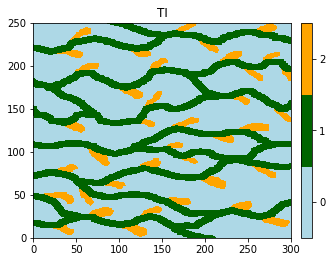

In [3]:
col = ['lightblue', 'darkgreen', 'orange']

plt.figure(figsize=(5,5))
imgplt.drawImage2D(ti, categ=True, categCol=col, title='TI')

## Hard data (point set)

Read the hard data.

In [4]:
hd = img.readPointSetGslib('hd.gslib')

# Set colors for hard data cells (for further plots)
hd_col=[col[int(v)] for v in hd.val[3]]
# Or convert the color to 'rgba' if required
##import matplotlib.colors
##hd_col=[matplotlib.colors.to_rgba(col[int(v)]) for v in hd.val[3]]

## Getting simulation path and error from deesse (class `dsi.DeesseInput`)
### Simulation path
It consists of an index attached to each simulation grid cell. The indexes give the order in which the cells are simulated (index = -1 for conditioning cells).
### Error
It consists of the (relative) error attached to each simulation grid cell. The error is zero if the acceptation threshold has been reached, and positive otherwise. The error map highlights the regions where the simulation has been done without reaching the threshold and then where the reproduction of the structures might be poor. 
### Fill the input structure for deesse and launch deesse
To get the simulation path and the error, set respectively the flags `outputPathIndexFlag` and `outputErrorFlag` to `True`.

In [5]:
deesse_input = dsi.DeesseInput(
    nx=100, ny=100, nz=1,
    nv=1, varname='code',
    nTI=1, TI=ti,
    dataPointSet=hd,
    outputPathIndexFlag=True, # get simulation path in output (default: False)
    outputErrorFlag=True,     # get error in output (default: False)
    distanceType=0,
    nneighboringNode=24,
    distanceThreshold=0.05,
    maxScanFraction=0.25,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=1)

deesse_output = dsi.deesseRun(deesse_input)

********************************************************************************
DEESSE VERSION 3.0 / BUILD NUMBER 20190110
********************************************************************************
DONE


## Retrieve the results (and display)

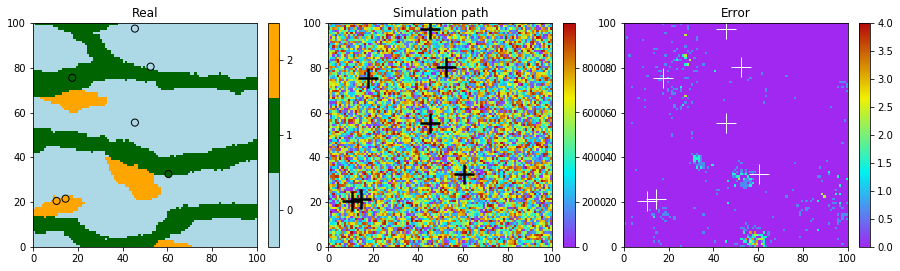

In [6]:
# Retrieve the realizations, the simulation paths and the error maps (lists)
sim = deesse_output['sim']
path = deesse_output['path']
err = deesse_output['error']

# Display
plt.subplots(1, 3, figsize=(15,5)) # 1 x 3 sub-plots

plt.subplot(1, 3, 1)
imgplt.drawImage2D(sim[0], categ=True, categCol=col, title='Real') # plot real
plt.scatter(hd.x(), hd.y(), marker='o', s=50, color=hd_col, edgecolors='black', lw=1) # add hard data points

plt.subplot(1, 3, 2)
imgplt.drawImage2D(path[0], title='Simulation path') # plot simulation path
plt.plot(hd.x(), hd.y(), '+', markersize=20, c='k', markeredgewidth=2.5) # add hard data points

plt.subplot(1, 3, 3)
imgplt.drawImage2D(err[0], title='Error') # plot error map
plt.plot(hd.x(), hd.y(), '+', markersize=20, c='white') # add hard data points

## Specifying the simulation path type
Several types of simulation path are available. It is specified by the parameter `simPathType` (of the class `dsi.DeesseInput`), which is a character string:
- `random`: random path (default)
- `random_hd_distance_pdf`: random path set according to the distance to the ensemble of conditioning cells based on a probability distribution function (pdf): cells closer to a conditioning cell have a higher probability to be visited in the beginning of the path. It requires the parameter `simPathStrength`, a float in between 0 and 1: the closer to 1, more the path will be guided by the conditioning cells. (For unconditional simulation, one cell randomly chosen in the simulation grid will play the role of conditioning cell.)
- `random_hd_distance_sort`: random path set according to the distance to the ensemble of conditioning cells based on sort: the cells are sorted with respect to this distance combined with a random noise. It requires the parameter `simPathStrength`, a float in between 0 and 1: the closer to 1, more the path will be guided by the conditioning cells. (For unconditional simulation, one cell randomly chosen in the simulation grid will play the role of conditioning cell.)
- `random_hd_distance_sum_pdf`: random path set according to the sum of distances to the conditioning cells based on pdf. It requires the parameter `simPathPower`, a positive float to which the distances are raised before computing the sum, and the pararmeter `simPathStrength`, a float in between 0 and 1: the closer to 1, more the path will be guided by the conditioning cells. (For unconditional simulation, a random path is used.)
- `random_hd_distance_sum_sort`: random path set according to the sum of distances to the conditioning cells based on sort. It requires the parameter `simPathPower`, a positive float to which the distances are raised before computing the sum, and the pararmeter `simPathStrength`, a float in between 0 and 1: the closer to 1, more the path will be guided by the conditioning cells. (For unconditional simulation, a random path is used.)
- `unilateral`: unilateral path which requires the parameter `simPathUnilateralOrder` defining the order the axes (x, y, z\[, v (variables)\]) will be handled (see the doc by typing `help(dsi.DeesseInput)`.

Some examples are given below.

### Random path according to the distance to hard data point set based on pdf

In [7]:
# path: 'random_hd_distance_pdf', strength: 0.8
deesse_input = dsi.DeesseInput(
    nx=100, ny=100, nz=1,
    nv=1, varname='code',
    nTI=1, TI=ti,
    dataPointSet=hd,
    outputPathIndexFlag=True,
    outputErrorFlag=True,
    simPathType='random_hd_distance_pdf',  # set simulation path type
    simPathStrength=0.8,                   #    set parameter for the path
    distanceType=0,
    nneighboringNode=24,
    distanceThreshold=0.05,
    maxScanFraction=0.25,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=1)

deesse_output = dsi.deesseRun(deesse_input)

********************************************************************************
DEESSE VERSION 3.0 / BUILD NUMBER 20190110
********************************************************************************
DONE


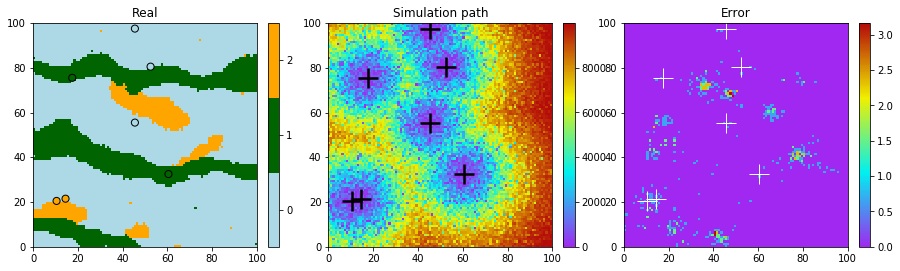

In [8]:
# Retrieve the realizations, the simulation paths and the error maps (lists)
sim = deesse_output['sim']
path = deesse_output['path']
err = deesse_output['error']

# Display
plt.subplots(1, 3, figsize=(15,5)) # 1 x 3 sub-plots

plt.subplot(1, 3, 1)
imgplt.drawImage2D(sim[0], categ=True, categCol=col, title='Real') # plot real
plt.scatter(hd.x(), hd.y(), marker='o', s=50, color=hd_col, edgecolors='black', lw=1) # add hard data points

plt.subplot(1, 3, 2)
imgplt.drawImage2D(path[0], title='Simulation path') # plot simulation path
plt.plot(hd.x(), hd.y(), '+', markersize=20, c='k', markeredgewidth=2.5) # add hard data points

plt.subplot(1, 3, 3)
imgplt.drawImage2D(err[0], title='Error') # plot error map
plt.plot(hd.x(), hd.y(), '+', markersize=20, c='white') # add hard data points

### Random path according to the distance to hard data point set based on sort

In [9]:
# path: 'random_hd_distance_sort', strength: 0.5
deesse_input = dsi.DeesseInput(
    nx=100, ny=100, nz=1,
    nv=1, varname='code',
    nTI=1, TI=ti,
    dataPointSet=hd,
    outputPathIndexFlag=True,
    outputErrorFlag=True,
    simPathType='random_hd_distance_sort',  # set simulation path type
    simPathStrength=0.5,                    #    set parameter for the path
    distanceType=0,
    nneighboringNode=24,
    distanceThreshold=0.05,
    maxScanFraction=0.25,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=1)

deesse_output = dsi.deesseRun(deesse_input)

********************************************************************************
DEESSE VERSION 3.0 / BUILD NUMBER 20190110
********************************************************************************
DONE


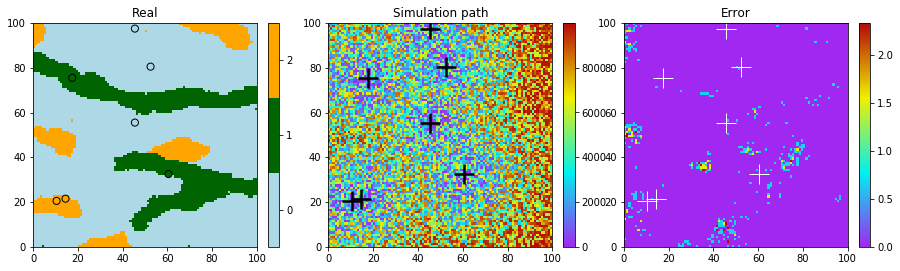

In [10]:
sim = deesse_output['sim']
path = deesse_output['path']
err = deesse_output['error']

plt.subplots(1, 3, figsize=(15,5)) # 1 x 3 sub-plots

plt.subplot(1, 3, 1)
imgplt.drawImage2D(sim[0], categ=True, categCol=col, title='Real') # plot real
plt.scatter(hd.x(), hd.y(), marker='o', s=50, color=hd_col, edgecolors='black', lw=1) # add hard data points

plt.subplot(1, 3, 2)
imgplt.drawImage2D(path[0], title='Simulation path') # plot simulation path
plt.plot(hd.x(), hd.y(), '+', markersize=20, c='k', markeredgewidth=2.5) # add hard data points

plt.subplot(1, 3, 3)
imgplt.drawImage2D(err[0], title='Error') # plot error map
plt.plot(hd.x(), hd.y(), '+', markersize=20, c='white') # add hard data points

### Random path according to the sum of distances to hard data points based on pdf

In [11]:
# path: 'random_hd_distance_sum_pdf', power: 1.0, strength: 0.8
deesse_input = dsi.DeesseInput(
    nx=100, ny=100, nz=1,
    nv=1, varname='code',
    nTI=1, TI=ti,
    dataPointSet=hd,
    outputPathIndexFlag=True,
    outputErrorFlag=True,
    simPathType='random_hd_distance_sum_pdf',  # set simulation path type
    simPathPower=1.0,                          #    set parameter for the path
    simPathStrength=0.8,                       #    set parameter for the path
    distanceType=0,
    nneighboringNode=24,
    distanceThreshold=0.05,
    maxScanFraction=0.25,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=1)

deesse_output = dsi.deesseRun(deesse_input)

********************************************************************************
DEESSE VERSION 3.0 / BUILD NUMBER 20190110
********************************************************************************
DONE


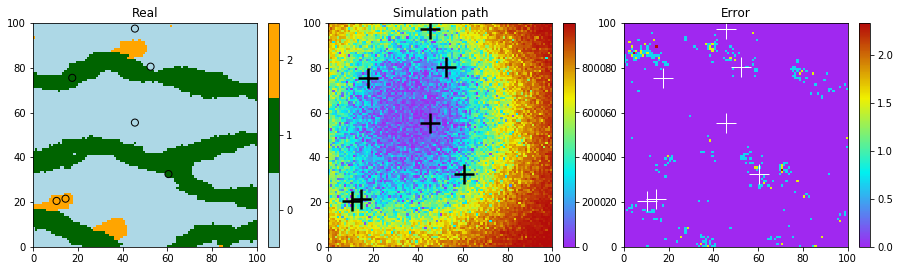

In [12]:
# Retrieve the realizations, the simulation paths and the error maps (lists)
sim = deesse_output['sim']
path = deesse_output['path']
err = deesse_output['error']

# Display
plt.subplots(1, 3, figsize=(15,5)) # 1 x 3 sub-plots

plt.subplot(1, 3, 1)
imgplt.drawImage2D(sim[0], categ=True, categCol=col, title='Real') # plot real
plt.scatter(hd.x(), hd.y(), marker='o', s=50, color=hd_col, edgecolors='black', lw=1) # add hard data points

plt.subplot(1, 3, 2)
imgplt.drawImage2D(path[0], title='Simulation path') # plot simulation path
plt.plot(hd.x(), hd.y(), '+', markersize=20, c='k', markeredgewidth=2.5) # add hard data points

plt.subplot(1, 3, 3)
imgplt.drawImage2D(err[0], title='Error') # plot error map
plt.plot(hd.x(), hd.y(), '+', markersize=20, c='white') # add hard data points

### Random path according to the sum of distances to hard data points based on sort

In [13]:
# path: 'random_hd_distance_sum_sort', power: 1.0, strength: 0.5
deesse_input = dsi.DeesseInput(
    nx=100, ny=100, nz=1,
    nv=1, varname='code',
    nTI=1, TI=ti,
    dataPointSet=hd,
    outputPathIndexFlag=True,
    outputErrorFlag=True,
    simPathType='random_hd_distance_sum_sort', # set simulation path type
    simPathPower=1.0,                          #    set parameter for the path
    simPathStrength=0.5,                       #    set parameter for the path
    distanceType=0,
    nneighboringNode=24,
    distanceThreshold=0.05,
    maxScanFraction=0.25,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=1)

deesse_output = dsi.deesseRun(deesse_input)

********************************************************************************
DEESSE VERSION 3.0 / BUILD NUMBER 20190110
********************************************************************************
DONE


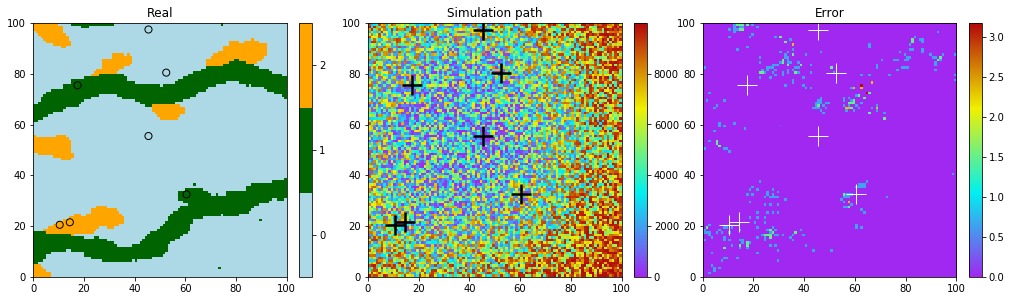

In [14]:
# Retrieve the realizations, the simulation paths and the error maps (lists)
sim = deesse_output['sim']
path = deesse_output['path']
err = deesse_output['error']

# Display
plt.subplots(1, 3, figsize=(17,5)) # 1 x 3 sub-plots

plt.subplot(1, 3, 1)
imgplt.drawImage2D(sim[0], categ=True, categCol=col, title='Real') # plot real
plt.scatter(hd.x(), hd.y(), marker='o', s=50, color=hd_col, edgecolors='black', lw=1) # add hard data points

plt.subplot(1, 3, 2)
imgplt.drawImage2D(path[0], title='Simulation path') # plot simulation path
plt.plot(hd.x(), hd.y(), '+', markersize=20, c='k', markeredgewidth=2.5) # add hard data points

plt.subplot(1, 3, 3)
imgplt.drawImage2D(err[0], title='Error') # plot error map
plt.plot(hd.x(), hd.y(), '+', markersize=20, c='white') # add hard data points